# Paramétrage de l'environnement de travail et import des packages

In [1]:
import sys
from pathlib import Path

In [2]:
ROOT = Path.cwd().parents[0]

RAW_DATA = ROOT / "01_data" / "01_raw"
PROCESSED_DATA = ROOT / "01_data" / "02_processed"

NOTEBOOK = ROOT / "02_notebooks"

FONCTIONS = ROOT / "03_fonctions"

%load_ext autoreload
%autoreload 2
sys.path.append(str(ROOT / "03_fonctions"))

In [4]:
import pandas as pd
import seaborn as sns

from cheat_tools.data_manipulation import missing_percentage
from cheat_tools.data_visualization import plot_countplots_bivarie_grid, plot_boxplots_grid, plot_countplots_grid,afficher_heatmap_correlation, smart_countplot, plot_kde_multivariables_grid
from cheat_tools.stat_tests import analyser_dependance_khi2, analyser_dependance_mannwhitney
from cheat_tools.cartography import carte_interactive


# Global

**Informations globales sur le jeu de données**

In [5]:
data_housing = pd.read_csv(PROCESSED_DATA / "01_merge" / "housing_open_data_processed.csv",
                           dtype={'id_annonce':"object"})


In [6]:
data_housing.head()

id_annonce code_insee property_type  approximate_latitude  \
0      11541      01263        maison             46.083952   
1      09207      06004   appartement             43.587061   
2      15840      76351   appartement             49.500023   
3      28263      08105        divers             49.770367   
4      03543      34147        maison             43.470415   

   approximate_longitude    size  floor  land_size  energy_performance_value  \
0               4.762737   117.0    NaN      471.0                     193.0   
1               7.115609  6061.0    1.0        NaN                     147.0   
2               0.137997    64.0    3.0        NaN                       NaN   
3               4.713661   200.0    NaN        NaN                       NaN   
4               3.217742   107.0    NaN        NaN                       NaN   

   ghg_value  ...  nb_lits_village_vacances  nb_residence_tourisme  \
0       39.0  ...                       0.0                    0.0   
1        6.0  ...                      90.0                   11.0   
2        NaN  ...                       0.0                    5.0   
3        NaN  ...                       0.0                    0.0   
4        NaN  ...                       0.0                    0.0   

   nb_lits_residence_tourisme  proximite_gare  proximite_commerce_alimentaire  \
0                         0.0     4060.663091                      503.962340   
1                      2868.0      334.590889                      208.912090   
2                      1354.0     1185.111294                       66.562934   
3                         0.0      871.739936                      360.852713   
4                         0.0      989.242031                      393.619095   

   proximite_education_primaire  proximite_education_secondaire  \
0                    371.347401                      477.491214   
1                    404.334941                      203.051326   
2                    124.566740                      432.245667   
3                    104.030820                      477.026586   
4                    346.408230                      190.920116   

   proximite_sante  densite_services_rayon  target  
0       621.392783                    12.0       0  
1       171.678997                   223.0       0  
2       563.297088                   189.0       0  
3       475.010125                   112.0       1  
4       512.692177                    18.0       0  

[5 rows x 48 columns]

In [7]:
data_housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29894 entries, 0 to 29893
Data columns (total 48 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id_annonce                      29894 non-null  object 
 1   code_insee                      29894 non-null  object 
 2   property_type                   29894 non-null  object 
 3   approximate_latitude            29894 non-null  float64
 4   approximate_longitude           29894 non-null  float64
 5   size                            29476 non-null  float64
 6   floor                           7818 non-null   float64
 7   land_size                       12486 non-null  float64
 8   energy_performance_value        15287 non-null  float64
 9   ghg_value                       14856 non-null  float64
 10  nb_rooms                        28664 non-null  float64
 11  nb_bedrooms                     27730 non-null  float64
 12  nb_bathrooms                    

In [8]:
data_housing.describe()

approximate_latitude  approximate_longitude           size  \
count          29894.000000           29894.000000   29476.000000   
mean              46.547615               2.616198    1093.863380   
std                2.353455               2.593866    5779.710007   
min               41.374436              -4.718490       1.000000   
25%               43.928447               1.095563      74.000000   
50%               46.933041               2.378032     115.000000   
75%               48.841204               4.620722     237.000000   
max               51.075892               9.503198  411311.000000   

             floor     land_size  energy_performance_value     ghg_value  \
count  7818.000000  1.248600e+04              15287.000000  14856.000000   
mean      3.451906  4.088617e+03                207.494996     33.487951   
std       6.589039  5.947820e+04                874.024502    346.492596   
min       1.000000  1.000000e+00                  0.000000      0.000000   
25%       1.000000  3.650000e+02                126.000000      8.000000   
50%       2.000000  7.930000e+02                180.000000     16.000000   
75%       4.000000  1.826750e+03                240.000000     36.000000   
max      55.000000  6.203700e+06             100000.000000  17024.000000   

           nb_rooms   nb_bedrooms  nb_bathrooms  ...  \
count  28664.000000  27730.000000  19268.000000  ...   
mean       4.247279      2.870285      0.920386  ...   
std        2.982144      2.228842      0.271467  ...   
min        0.000000      0.000000      0.000000  ...   
25%        3.000000      2.000000      1.000000  ...   
50%        4.000000      3.000000      1.000000  ...   
75%        5.000000      4.000000      1.000000  ...   
max      125.000000    118.000000      3.000000  ...   

       nb_lits_village_vacances  nb_residence_tourisme  \
count              29644.000000           29644.000000   
mean                  49.624814               2.041863   
std                  267.980165               5.243975   
min                    0.000000               0.000000   
25%                    0.000000               0.000000   
50%                    0.000000               0.000000   
75%                    0.000000               2.000000   
max                 3809.000000              48.000000   

       nb_lits_residence_tourisme  proximite_gare  \
count                29644.000000    29894.000000   
mean                   488.382438     5007.516054   
std                   1249.425784     6938.253293   
min                      0.000000        3.151350   
25%                      0.000000      931.106850   
50%                      0.000000     1755.001314   
75%                    398.000000     6380.974852   
max                  14492.000000    68639.944643   

       proximite_commerce_alimentaire  proximite_education_primaire  \
count                    29894.000000                  29894.000000   
mean                       657.662651                    601.448607   
std                        957.165877                    716.384103   
min                          1.311630                      3.315397   
25%                        150.111136                    200.318786   
50%                        350.754664                    390.802875   
75%                        738.481319                    760.984923   
max                      10149.054332                   9774.009310   

       proximite_education_secondaire  proximite_sante  \
count                    29894.000000     29894.000000   
mean                       881.362025       876.667976   
std                       1384.602511      1081.839984   
min                          1.948131         2.889442   
25%                        170.620244       302.361550   
50%                        402.324817       573.831358   
75%                        878.402012       991.258553   
max                      16328.164971     27727.058679   

       densite_services_rayon  

In [23]:
missing_percentage(data_housing).sort_values(by=0, ascending=False).head(31)

features     0
6                            floor  0.74
7                        land_size  0.58
9                        ghg_value  0.50
8         energy_performance_value  0.49
12                    nb_bathrooms  0.36
11                     nb_bedrooms  0.07
10                        nb_rooms  0.04
35         nb_hebergement_tourisme  0.01
23                      population  0.01
33               type_rural_urbain  0.01
25                   revenu_median  0.01
26            nb_actes_delinquants  0.01
24              nb_menages_fiscaux  0.01
37             nb_village_vacances  0.01
27  position_commune_unite_urbaine  0.01
28            taille_agglomeration  0.01
29              type_unite_urbaine  0.01
30         taille_pole_et_couronne  0.01
36                nb_lits_tourisme  0.01
40      nb_lits_residence_tourisme  0.01
38        nb_lits_village_vacances  0.01
39           nb_residence_tourisme  0.01
32              type_degre_densite  0.01
5                             size  0.01
31      role_commune_bassin_de_vie  0.01
34                type_touristique  0.00
41                  proximite_gare  0.00
42  proximite_commerce_alimentaire  0.00
43    proximite_education_primaire  0.00
44  proximite_education_secondaire  0.00
45                 proximite_sante  0.00

# Analyse univariée

**Comptage des modalités pour la variable cible**

<Axes: xlabel='target', ylabel='count'>

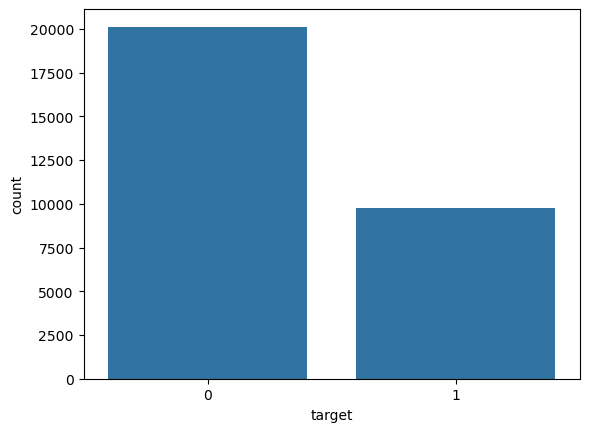

In [11]:
sns.countplot(data_housing,x="target")

**Comptage des modalités pour le type de propriété**

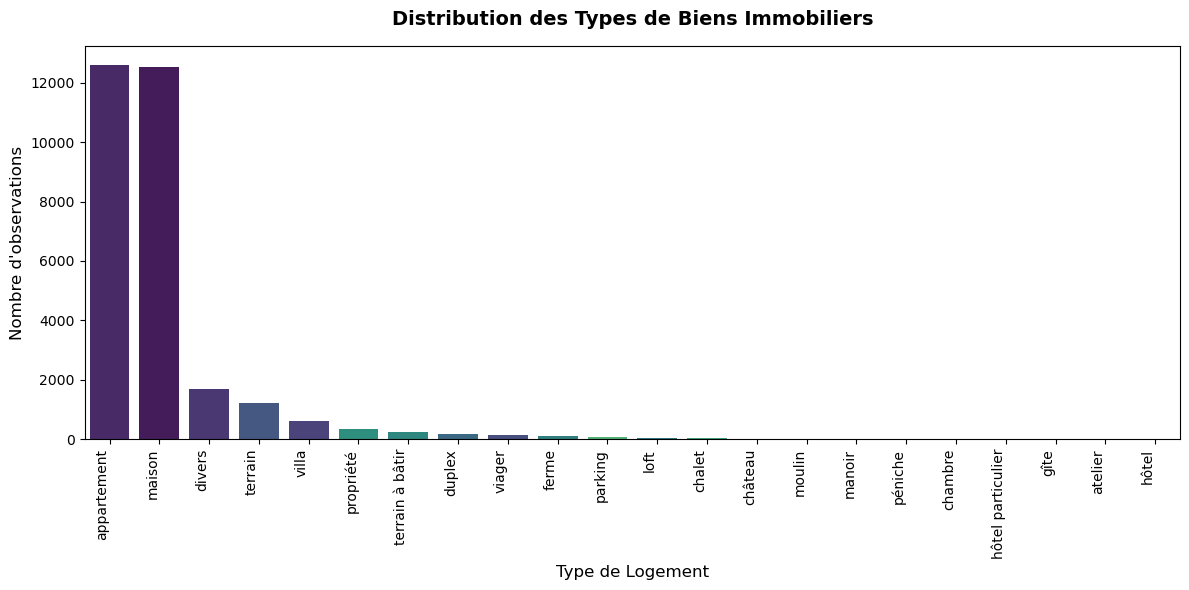

In [12]:
smart_countplot(
    data_housing, 
    "property_type", 
    titre="Distribution des Types de Biens Immobiliers", 
    xlabel="Type de Logement",
    rotation=90
    )

**Comptage des modalités pour les variables catégorielles**

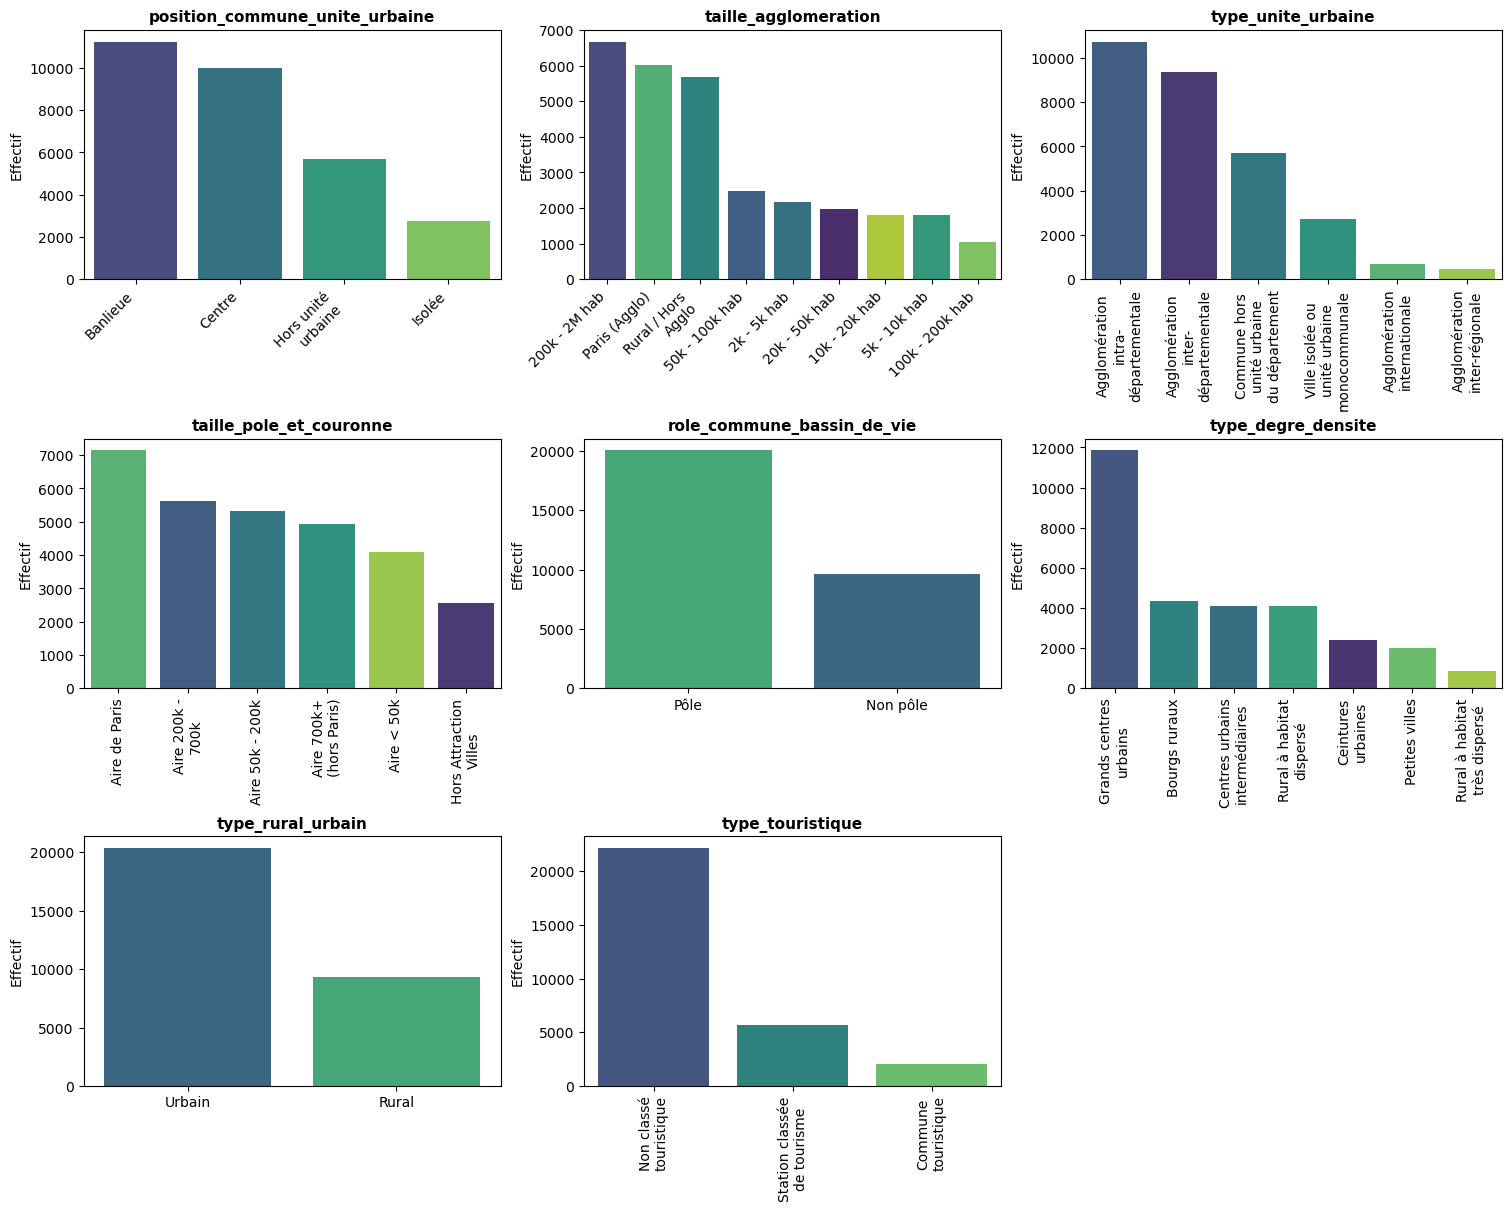

In [13]:
variables_interet = ["position_commune_unite_urbaine","taille_agglomeration","type_unite_urbaine",
                     "taille_pole_et_couronne","role_commune_bassin_de_vie","type_degre_densite",
                     "type_rural_urbain","type_touristique"]

plot_countplots_grid(
    data_housing,
    variables_interet
)

**Distributions pour les variables continues/ordinales d'interet**

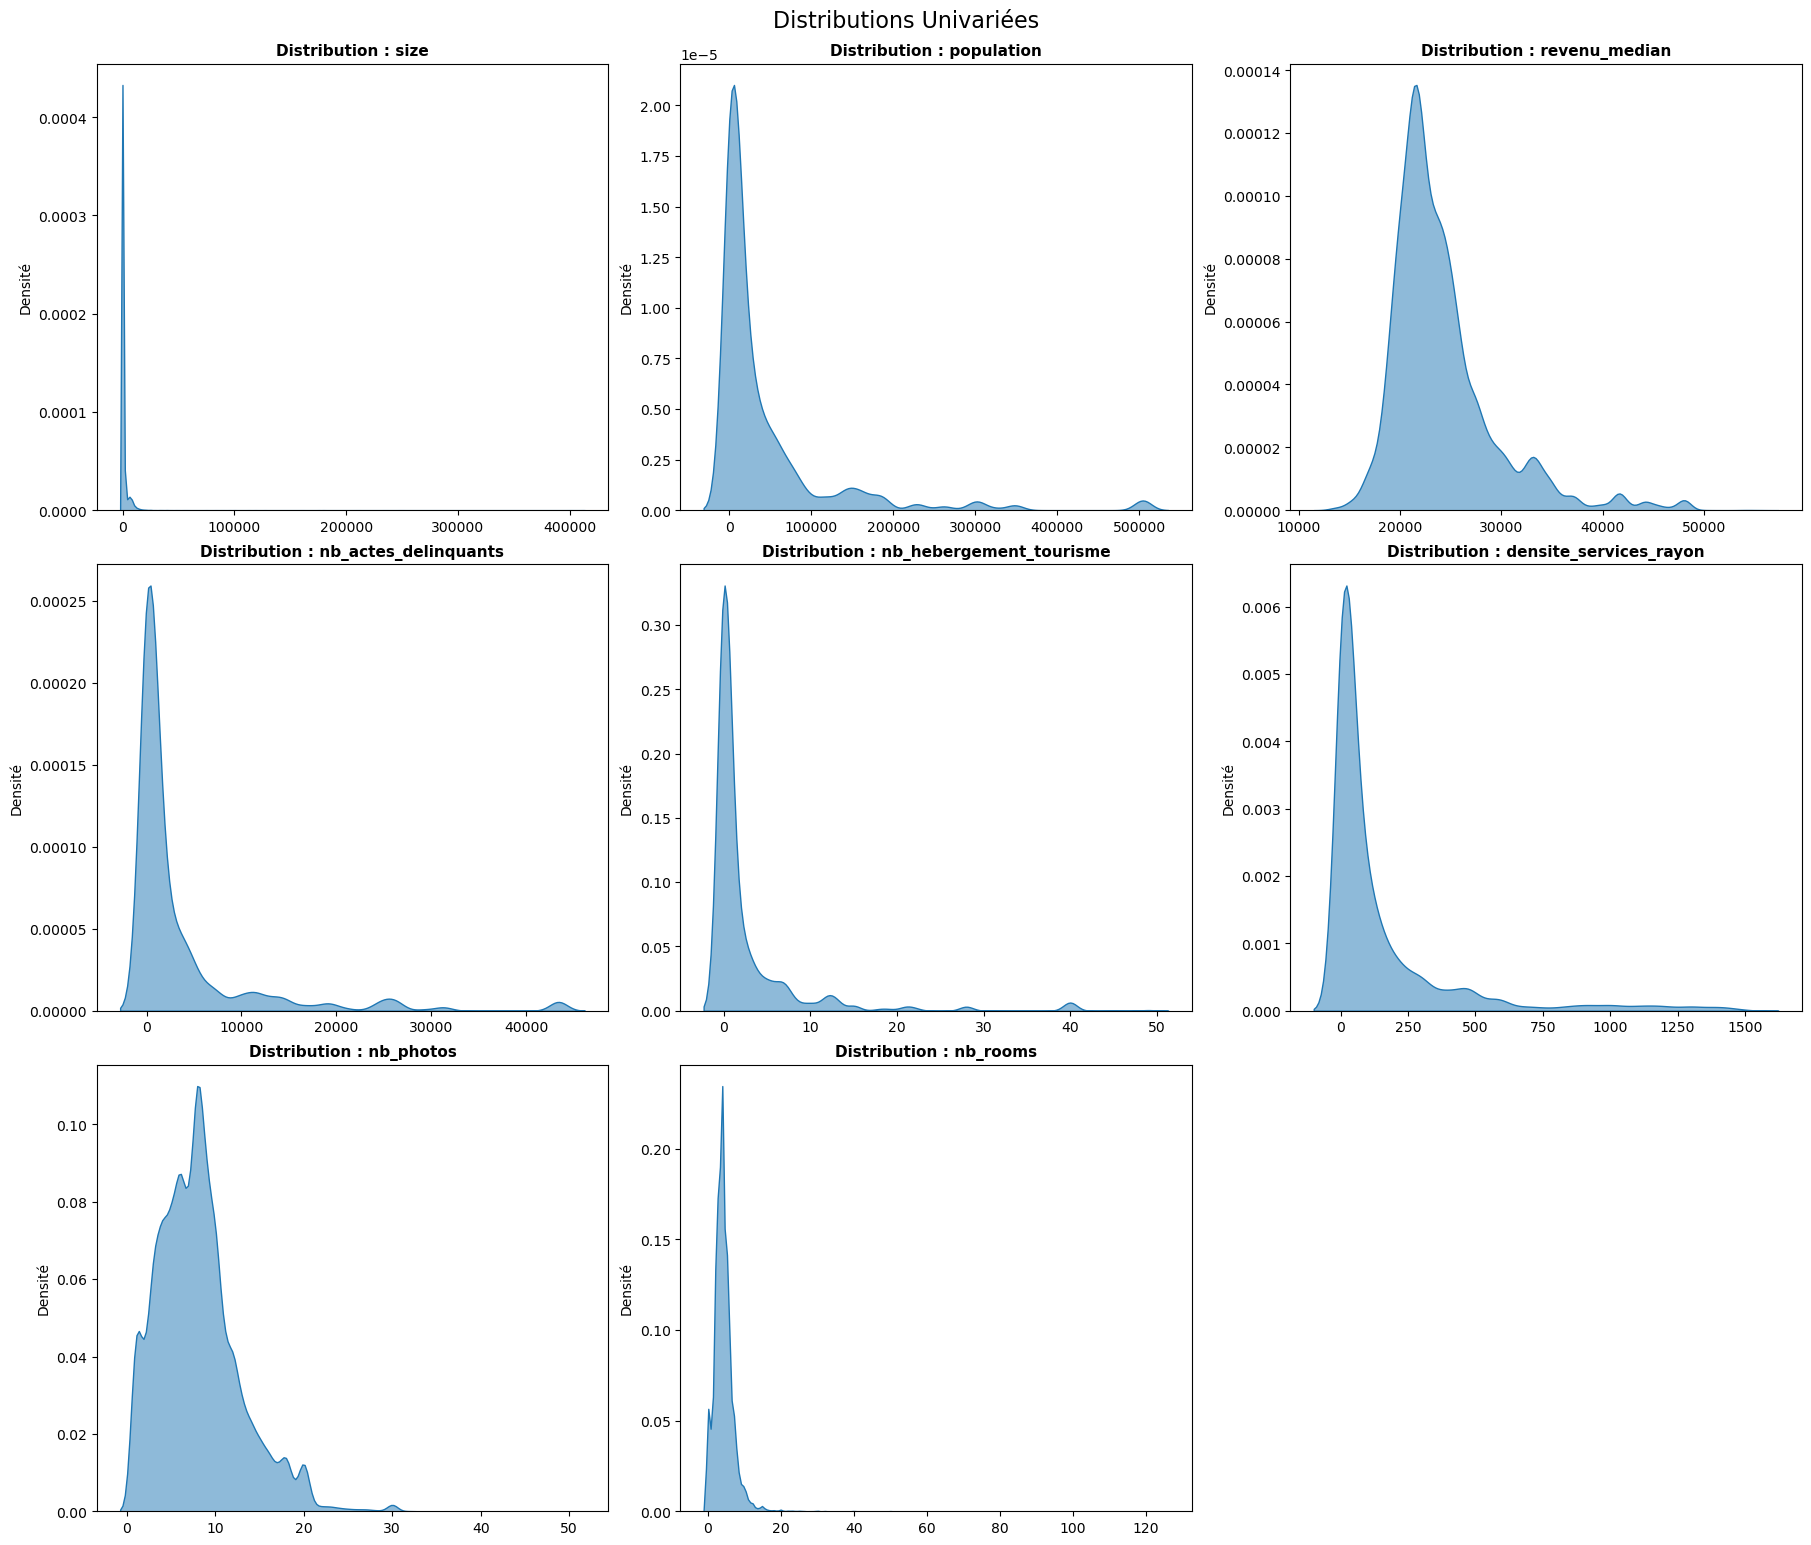

In [14]:
variables_interet = ["size","population","revenu_median",
                     "nb_actes_delinquants","nb_hebergement_tourisme","densite_services_rayon",
                     "nb_photos","nb_rooms"]

plot_kde_multivariables_grid(
    data_housing,
    variables_interet
)

**Boites à moustaches pour les variables continues/ordinales**

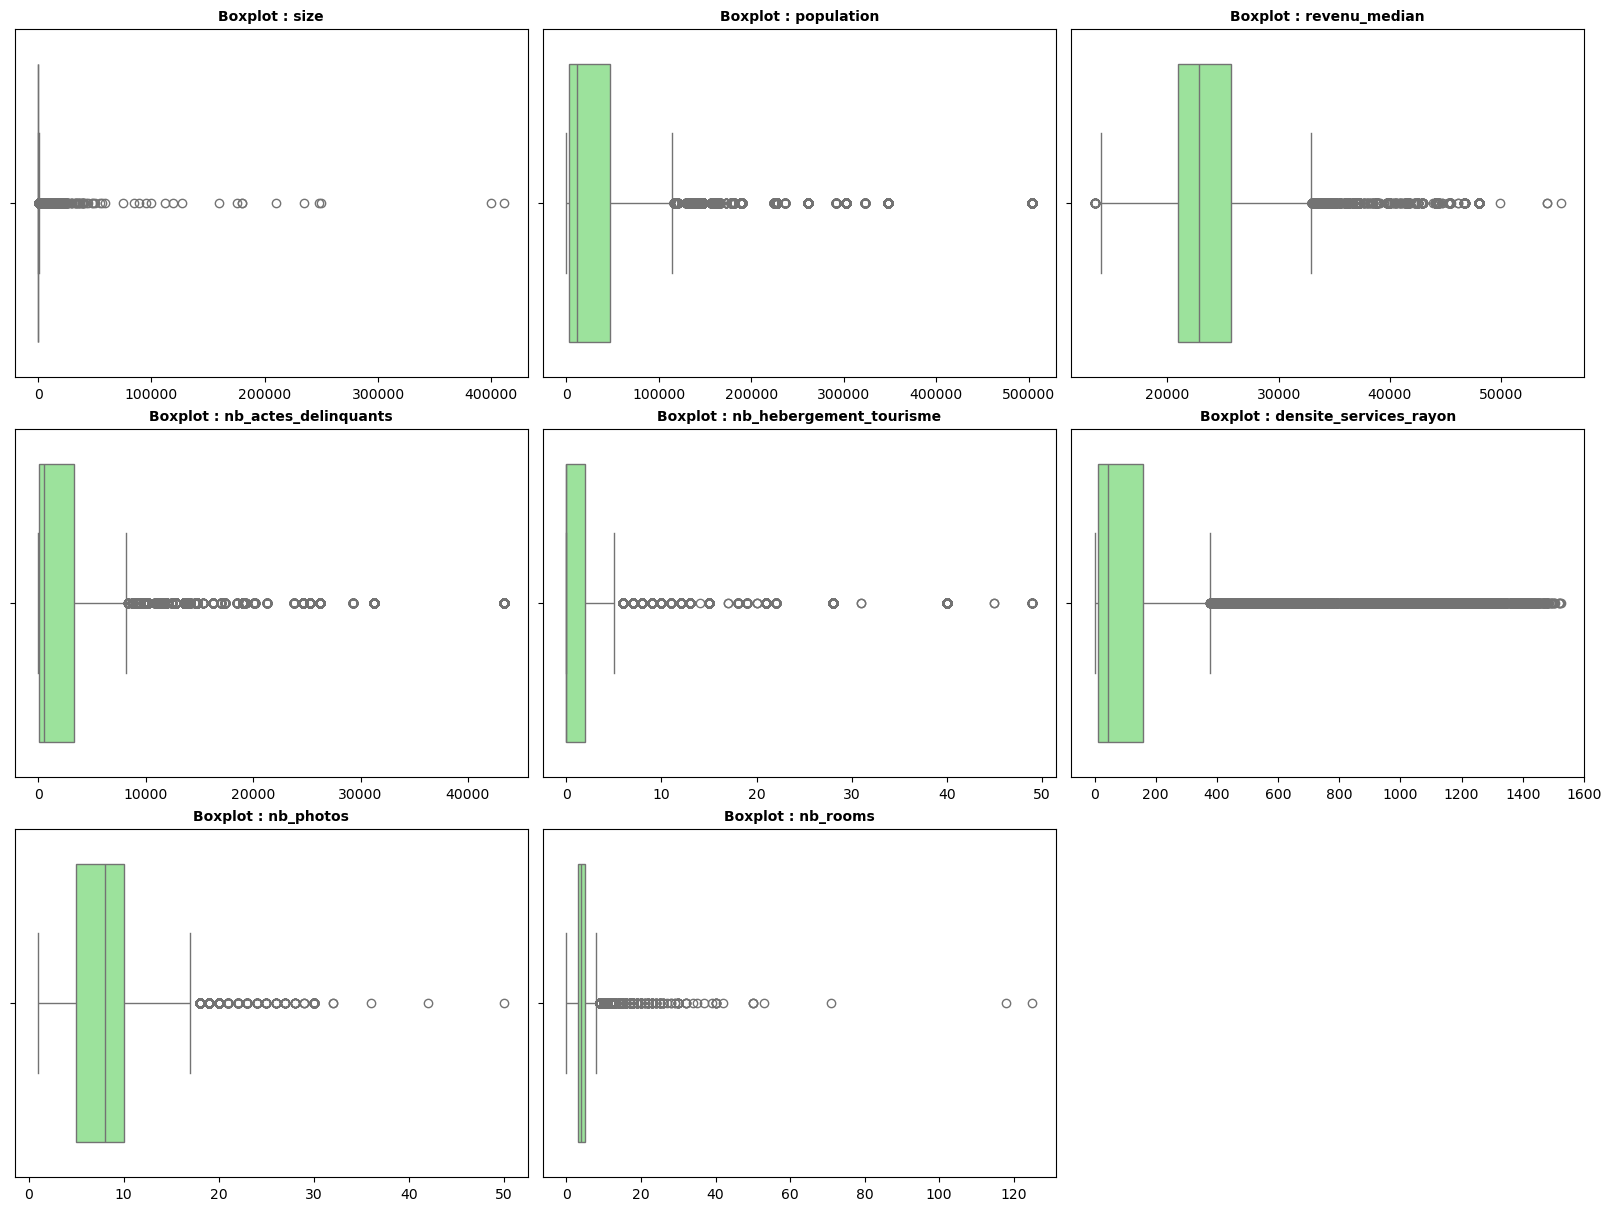

In [15]:
variables_interet = ["size","population","revenu_median",
                     "nb_actes_delinquants","nb_hebergement_tourisme","densite_services_rayon",
                     "nb_photos","nb_rooms"]

plot_boxplots_grid(
    data_housing,
    variables_interet
)

**Cartographie - Répartition géographique des prix immobiliers**

In [16]:
carte_interactive(
    df = data_housing,
    hue = "target",
    lat_col = "approximate_latitude",
    lon_col = "approximate_longitude",
    variable_info = "target",
    titre = "Répartition géographique des prix immobiliers"
)

⚠️ Dataset volumineux : affichage d'un échantillon de 20000 points.
Variable 'target' convertie en catégories pour l'affichage couleur.


In [17]:
carte_interactive(
    data_housing,
    "property_type",
    "approximate_latitude",
    "approximate_longitude",
    "target",
    "Répartition géographique des types de propriété"
)

⚠️ Dataset volumineux : affichage d'un échantillon de 20000 points.


# Analyse bivariée

**Matrice de corrélation pour les variables d'interet**

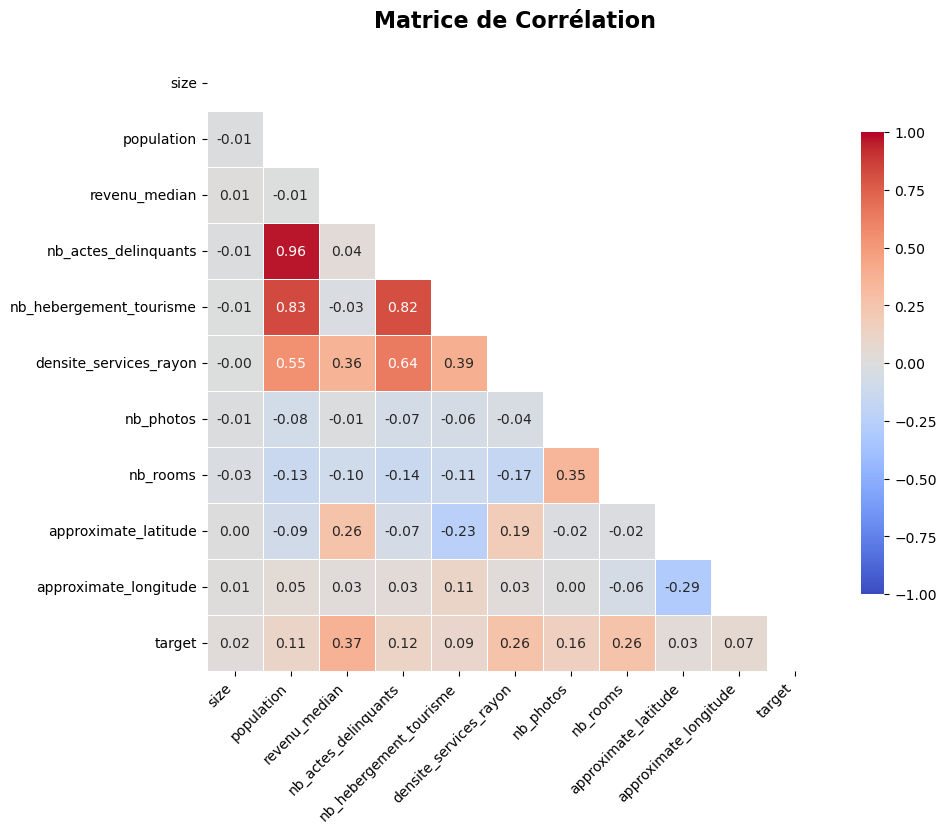

In [18]:
variables_interet = ["size","population","revenu_median",
                     "nb_actes_delinquants","nb_hebergement_tourisme","densite_services_rayon",
                     "nb_photos","nb_rooms","approximate_latitude","approximate_longitude","target"]

afficher_heatmap_correlation(
    data_housing,
    variables_interet
)

**Analyse de la distribution des variables continues d'interet en fonction de la variable cible**

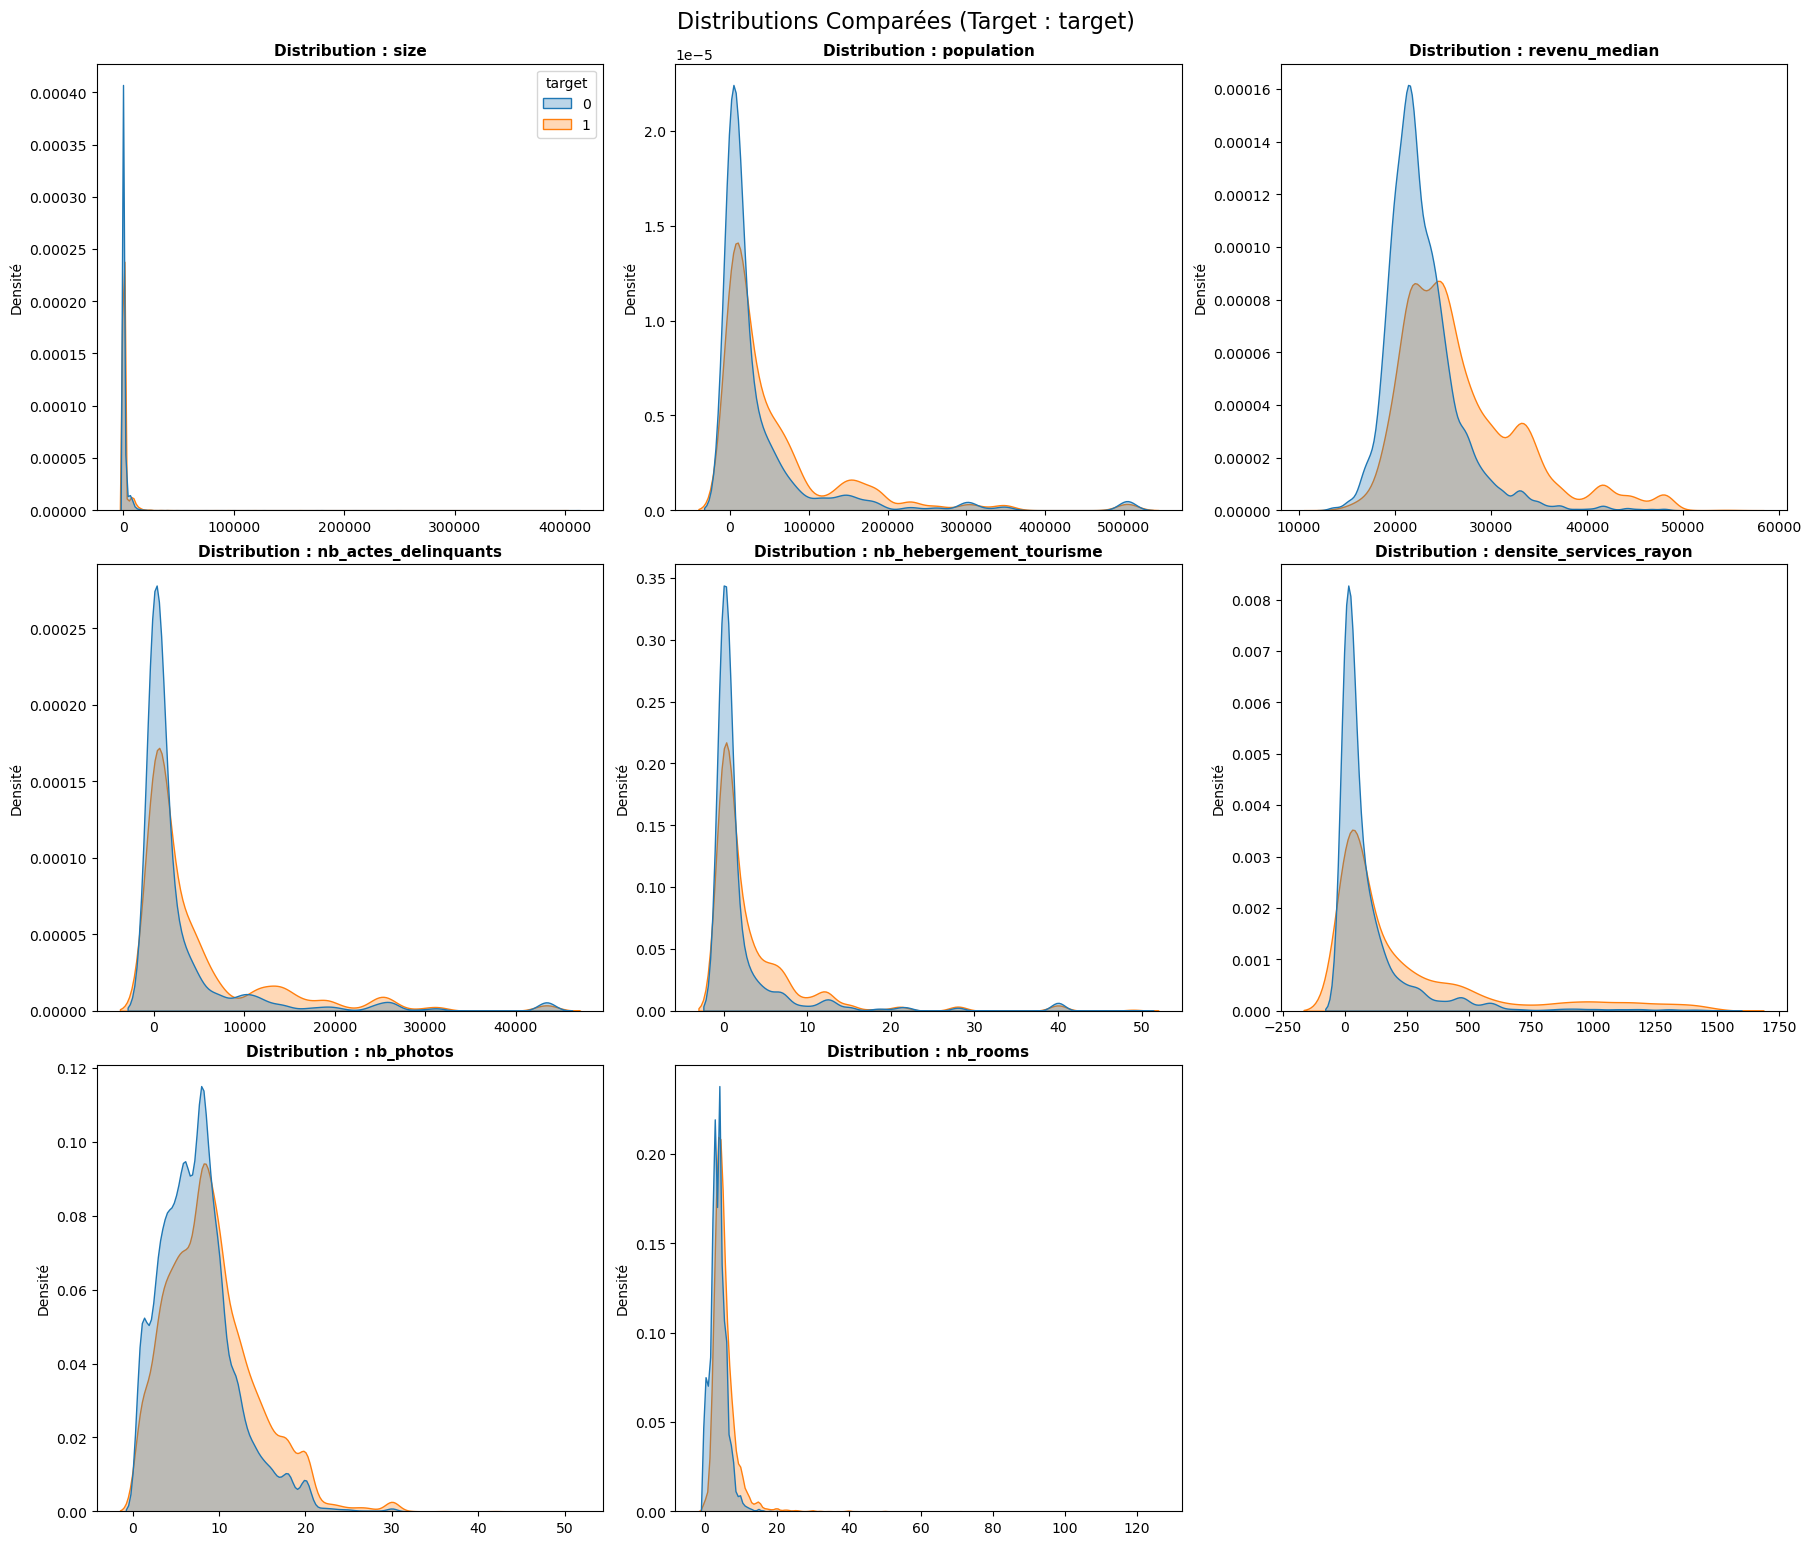

In [19]:
variables_interet = ["size","population","revenu_median",
                     "nb_actes_delinquants","nb_hebergement_tourisme","densite_services_rayon",
                     "nb_photos","nb_rooms"]

plot_kde_multivariables_grid(
    data_housing,
    variables_interet,
    "target"
)

**Test de Mann-Whitney**

In [20]:
variables_interet = ["size","population","revenu_median",
                     "nb_actes_delinquants","nb_hebergement_tourisme","densite_services_rayon",
                     "nb_photos","nb_rooms","nb_menages_fiscaux"]

analyser_dependance_mannwhitney(
    data_housing,
    "target",
    variables_interet
)

--- Analyse Mann-Whitney (Target Binaire : 'target') ---
--- Comparaison : Groupe '0' vs Groupe '1' ---


Variable  P-value Différence Significative  \
0            revenu_median  < 0.001                      OUI   
1                 nb_rooms  < 0.001                      OUI   
2   densite_services_rayon  < 0.001                      OUI   
3     nb_actes_delinquants  < 0.001                      OUI   
4       nb_menages_fiscaux  < 0.001                      OUI   
5               population  < 0.001                      OUI   
6  nb_hebergement_tourisme  < 0.001                      OUI   
7                     size  < 0.001                      OUI   
8                nb_photos  < 0.001                      OUI   

   Taille Effet (r) Direction Effet      U Stat  
0            0.4373         Positif  54071608.0  
1            0.3433         Positif  59508950.0  
2            0.3029         Positif  68526605.5  
3            0.2804         Positif  69640194.5  
4            0.2735         Positif  69812426.0  
5            0.2734         Positif  70418562.0  
6            0.2193         Positif  75558947.0  
7            0.2148         Positif  75208242.5  
8            0.1856         Positif  80053688.0

**Comptage variables catégorielles d'interet en fonction de la variable cible**

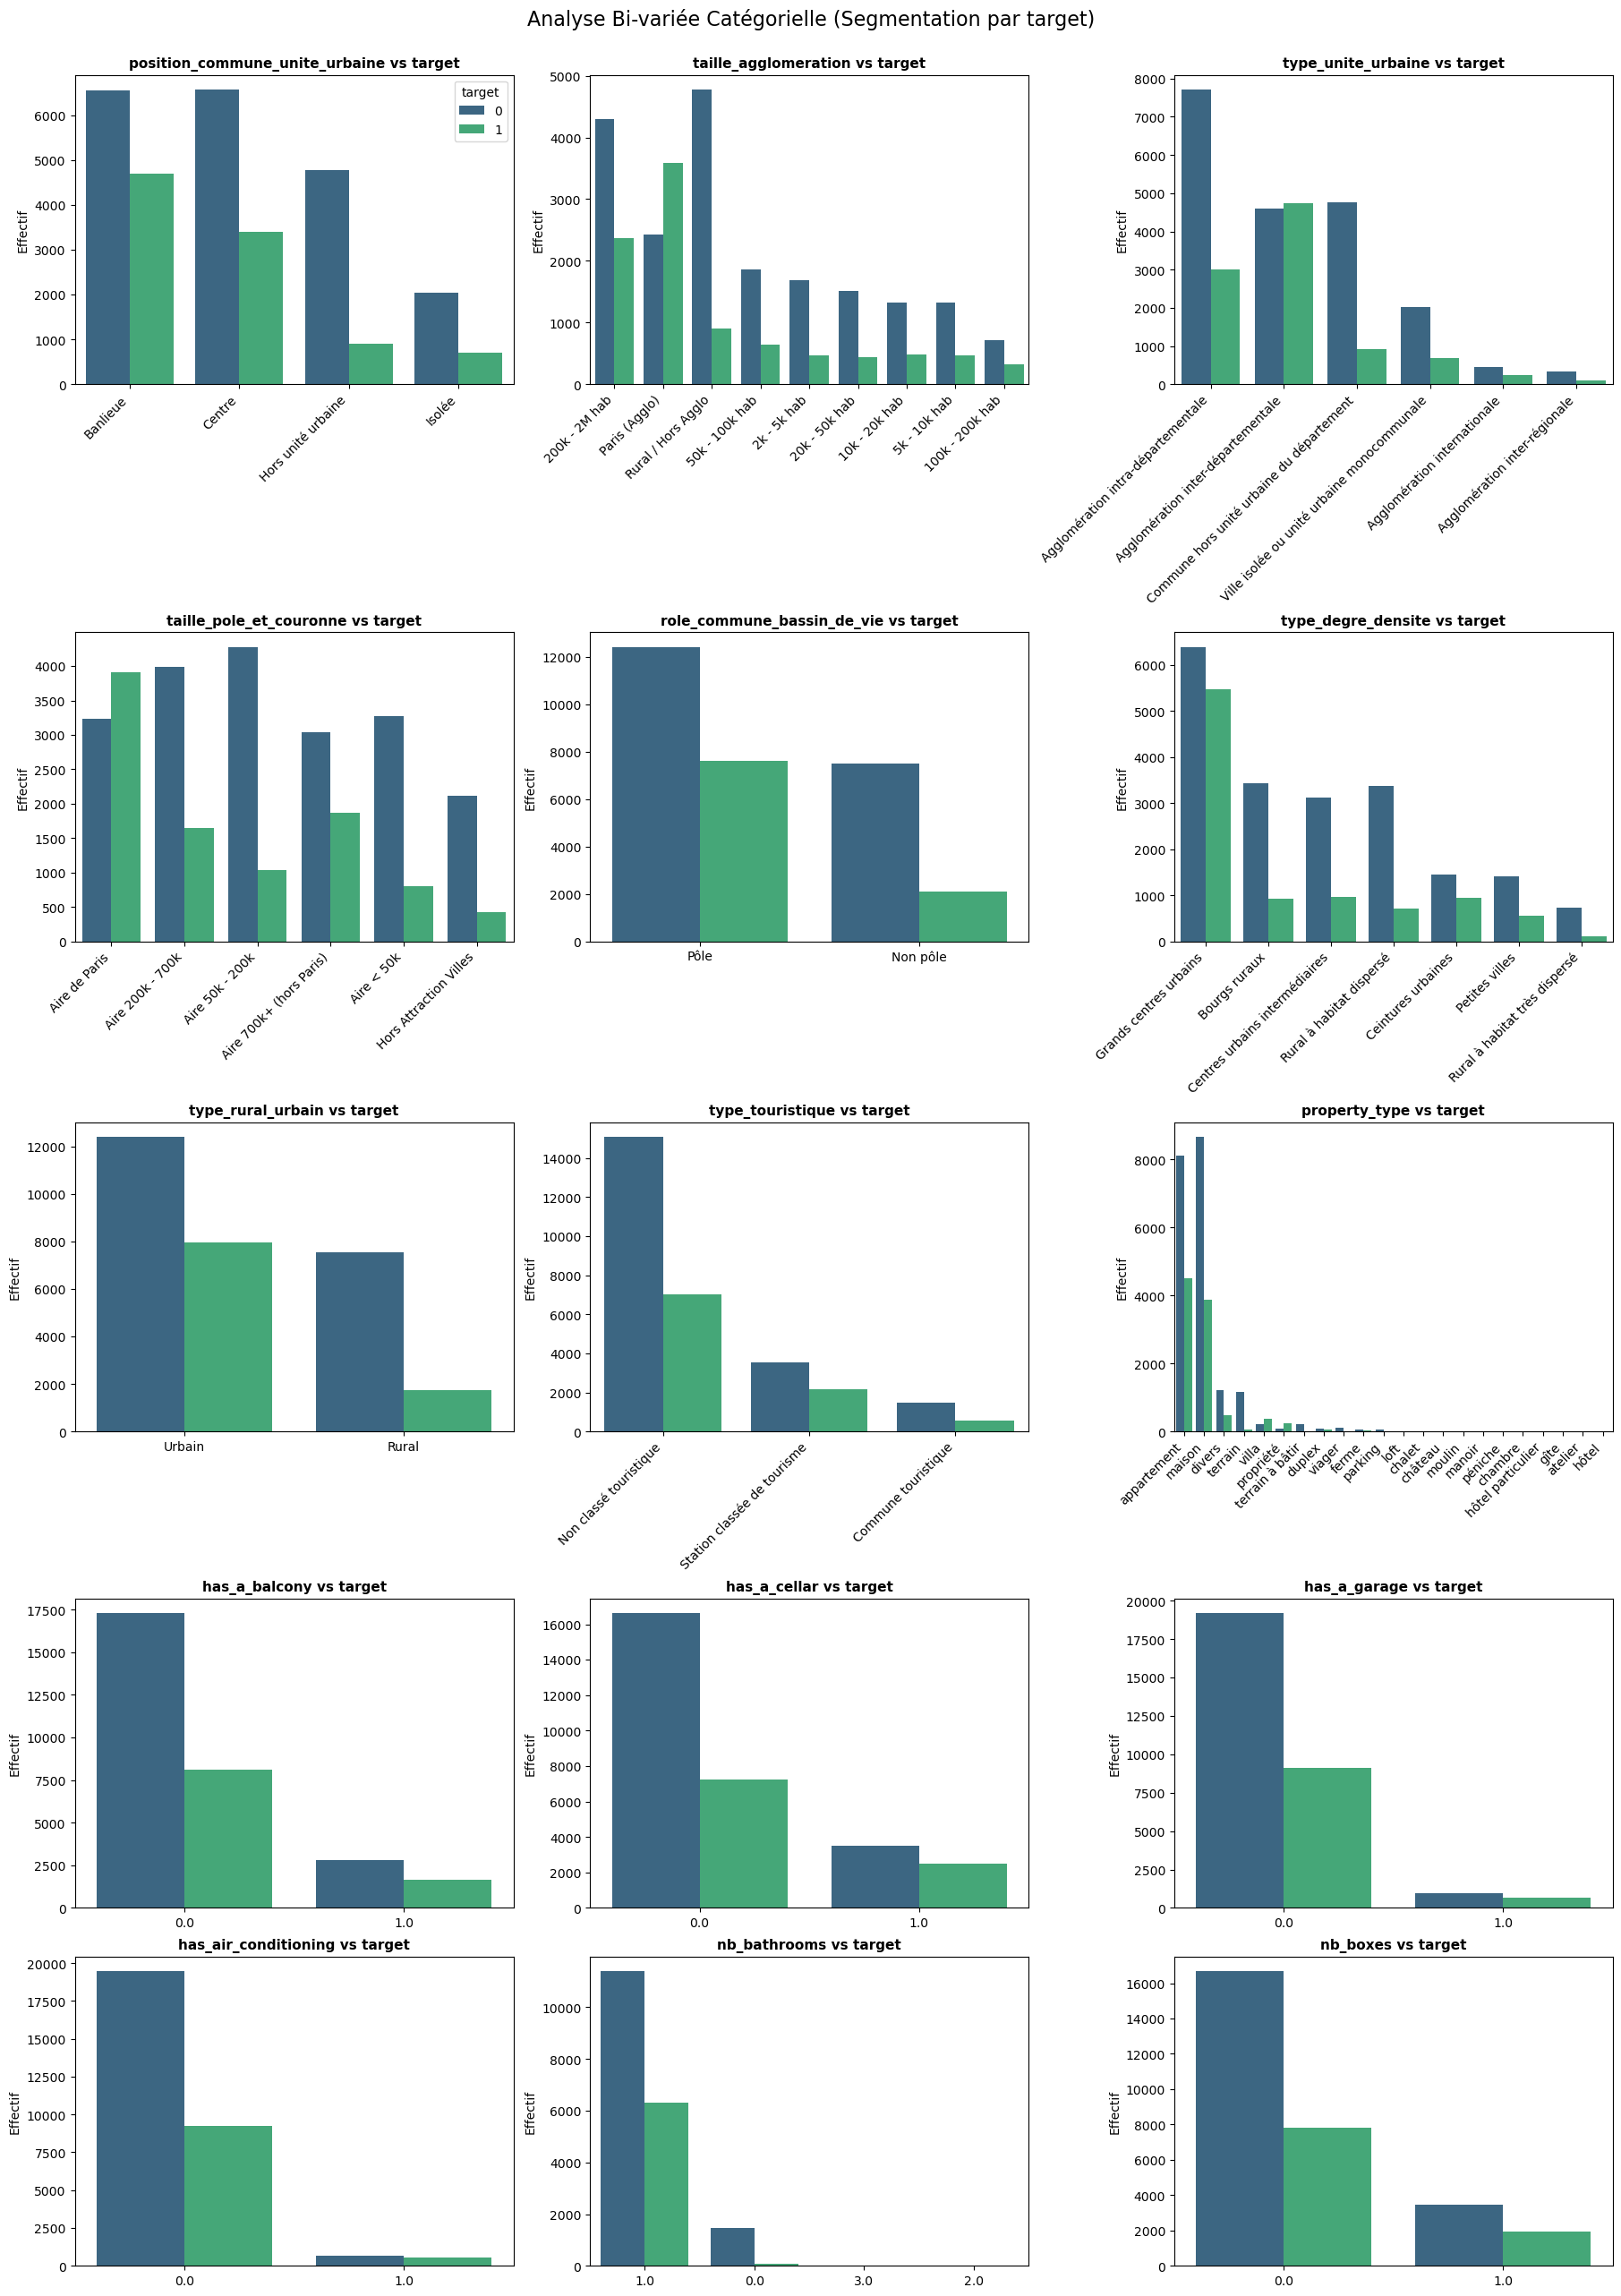

In [21]:
variables_interet = ["position_commune_unite_urbaine","taille_agglomeration","type_unite_urbaine",
                     "taille_pole_et_couronne","role_commune_bassin_de_vie","type_degre_densite",
                     "type_rural_urbain","type_touristique","property_type",
                     "has_a_balcony","has_a_cellar","has_a_garage",
                     "has_air_conditioning","nb_bathrooms","nb_boxes"]

plot_countplots_bivarie_grid(
    data_housing,
    "target",
    variables_interet
)

**Test de Khi2**

In [118]:
variables_interet = ["position_commune_unite_urbaine","taille_agglomeration","type_unite_urbaine",
                     "taille_pole_et_couronne","role_commune_bassin_de_vie","type_degre_densite",
                     "type_rural_urbain","type_touristique","property_type",
                     "has_a_balcony","has_a_cellar","has_a_garage",
                     "has_air_conditioning","nb_parking_places","nb_boxes","nb_terraces"]

analyser_dependance_khi2(
    data_housing,
    "target",
    variables_interet
    )

--- Analyse de dépendance (Khi-deux) avec la cible : 'target' ---


Variable  P-value Dépendance Significative  \
0             taille_agglomeration  < 0.001                      OUI   
1          taille_pole_et_couronne  < 0.001                      OUI   
2               type_unite_urbaine  < 0.001                      OUI   
3               type_degre_densite  < 0.001                      OUI   
4                    property_type  < 0.001                      OUI   
5   position_commune_unite_urbaine  < 0.001                      OUI   
6                type_rural_urbain  < 0.001                      OUI   
7       role_commune_bassin_de_vie  < 0.001                      OUI   
8                      nb_terraces  < 0.001                      OUI   
9                     has_a_cellar  < 0.001                      OUI   
10               nb_parking_places  < 0.001                      OUI   
11                type_touristique  < 0.001                      OUI   
12            has_air_conditioning  < 0.001                      OUI   
13                    has_a_garage  < 0.001                      OUI   
14                   has_a_balcony  < 0.001                      OUI   
15                        nb_boxes  < 0.001                      OUI   

    V de Cramer  Chi2 Stat  
0        0.3205    3044.18  
1        0.3007    2680.44  
2        0.2765    2266.10  
3        0.2603    2008.93  
4        0.2091    1306.53  
5        0.2011    1198.93  
6        0.1991    1175.42  
7        0.1608     766.15  
8        0.1358     551.19  
9        0.0983     289.14  
10       0.0738     162.98  
11       0.0564      95.05  
12       0.0552      91.24  
13       0.0451      60.71  
14       0.0364      39.54  
15       0.0345      35.59

# Note explicative du notebook

Cette première phase d’analyse exploratoire vise à comprendre la structure du dataset immobilier brut avant tout nettoyage approfondi ou modélisation.

### Objectifs de cette étape
- Identifier la structure des variables (types, distributions, cardinalités)
- Mesurer les taux de valeurs manquantes
- Étudier les relations bivariées avec la variable cible (`target`)
- Détecter d’éventuelles incohérences ou anomalies

### Principaux constats

- Le dataset présente une proportion significative de variables catégorielles (type de bien, exposition, équipements).
- Certaines variables numériques (ex : surface, nombre de pièces) présentent des distributions asymétriques avec présence de valeurs extrêmes.
- Le taux de données manquantes est hétérogène selon les variables, justifiant une stratégie de traitement différenciée.
- Des relations statistiques significatives apparaissent entre certaines variables explicatives et la cible (tests Khi² et Mann-Whitney).
- Les premières analyses suggèrent que la localisation et certaines caractéristiques structurelles du bien jouent un rôle déterminant.

### Implications pour la suite

Cette EDA permet de :
- Orienter les décisions de nettoyage et d’imputation
- Sélectionner des variables pertinentes pour la modélisation
- Identifier les transformations nécessaires (log, regroupements, encodage)

Elle constitue une base analytique pour les étapes suivantes : nettoyage post-EDA, enrichissement externe et modélisation.
